In [21]:
import numpy as np
import os
from scipy.io.wavfile import read as wavread
import python_speech_features as sf
import amfm_decompy.pYAAPT as pYAAPT
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import amfm_decompy.pYAAPT as pYAAPT
import amfm_decompy.basic_tools as basic

In [7]:
speakers = ['awb','bdl','clb','jmk','ksp','rms','slt']
root = os.getcwd()
folderpath = os.path.join(root,'datasets',speakers[0],'wav')
files = sorted(os.listdir(folderpath))


# Read the files
for file in files:
    file = os.path.join(folderpath,file)
    fs,audio = wavread(file)
    break
# IPython.display.Audio(file)


In [8]:
pitchY = pYAAPT.yaapt(audio, frame_length=40, tda_frame_length=40, f0_min=75, f0_max=600)

AttributeError: 'numpy.ndarray' object has no attribute 'fs'

In [16]:
signal = basic.SignalObj(audio)

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

In [17]:
help(basic.SignalObj)

Help on class SignalObj in module amfm_decompy.basic_tools:

class SignalObj(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, *args)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  filtered_version(self, bp_filter)
 |  
 |  noiser(self, pitch_track, SNR)
 |  
 |  set_nharm(self, pitch_track, n_harm_max)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



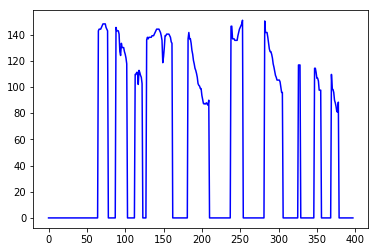

In [22]:
signal = basic.SignalObj(file)
pitchY = pYAAPT.yaapt(signal, frame_length=25, tda_frame_length=25, f0_min=40, f0_max=600)

plt.plot(pitchY.samp_values, label='YAAPT', color='blue')

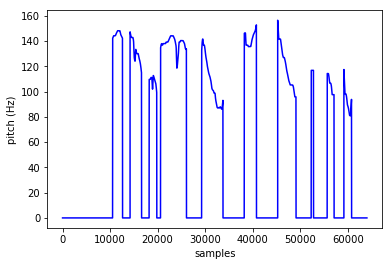

In [26]:
plt.plot(pitchY.values, label='YAAPT', color='blue')
plt.xlabel('samples')
plt.ylabel('pitch (Hz)')

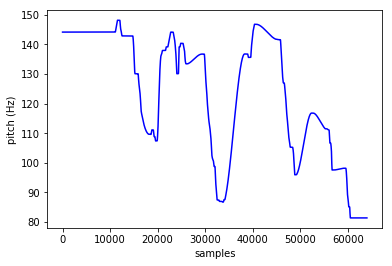

In [28]:
plt.plot(pitchY.values_interp, label='YAAPT', color='blue')
plt.xlabel('samples')
plt.ylabel('pitch (Hz)')

In [32]:
import IPython
IPython.display.Audio(file)

In [33]:
IPython.display.Audio(pitchY.values_interp)

TypeError: '<=' not supported between instances of 'NoneType' and 'int'

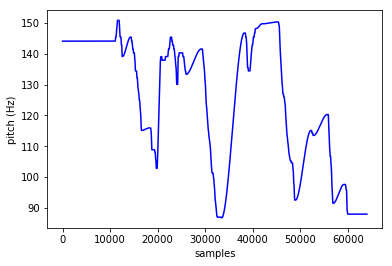

In [37]:
signal = basic.SignalObj(file)
pitchY = pYAAPT.yaapt(signal, frame_length=25, frame_space=5, f0_min=40, f0_max=200)

plt.plot(pitchY.values_interp, label='YAAPT', color='blue')
plt.xlabel('samples')
plt.ylabel('pitch (Hz)')